In [1]:
from model import Model
import torch
import os
import matplotlib.pyplot as plt
from helper import show_images, recursive_interpolation

MNIST_IMAGE_SHAPE = (1,28,28)
FACE_IMAGE_SHAPE = (1,300,300)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'using device : {device}\t'  + (f'{torch.cuda.get_device_name(0)}' if torch.cuda.is_available() else 'CPU' ))

image_shape = None

mode = ''

while(mode not in ('fashion', 'face')) :
    mode = input('Mode = (fashion, face) \nInput : ')
    if mode == 'face' :
        image_shape = FACE_IMAGE_SHAPE
    elif mode == 'fashion' :
        image_shape = MNIST_IMAGE_SHAPE
    else :
        print('Wrong input!')

print('Model loading...')

model = Model( beta = 'linear', T = 1000 , device = device, image_shape = image_shape) 
model_2 = Model( beta = 'interpolate_linear', T = 550 , device = device, image_shape = image_shape) 
model.model_load(mode)
model_2.model_load(mode)

print('\nModel is ready.\n')

using device : cuda	NVIDIA GeForce RTX 3060 Laptop GPU
Mode = (fashion, face) 
Input : fashioon
Wrong input!
Mode = (fashion, face) 
Input : fashion
Model loading...
Model loaded
Model loaded

Model is ready.



1000it [00:07, 141.78it/s]


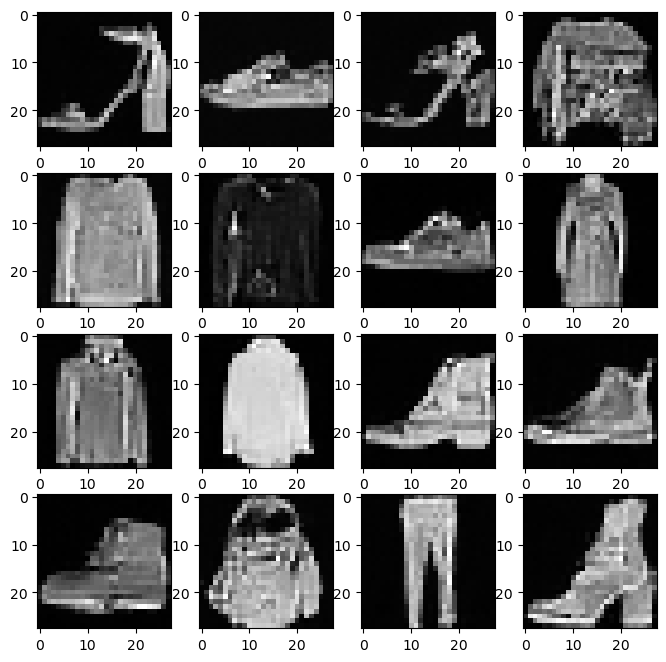


Image generation in progressing...

Pick target image. (1 ~ n) 
Input : 1

Image interpolation in progressing...



1000it [00:06, 159.17it/s]
550it [00:03, 168.87it/s]


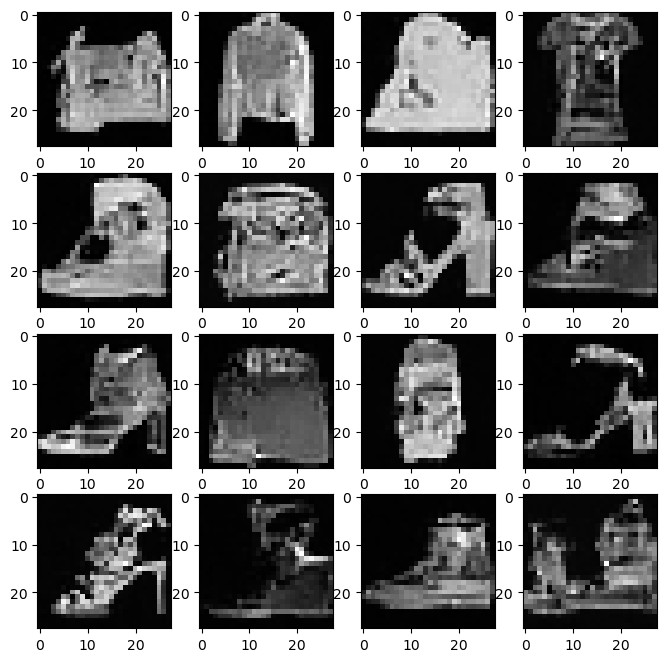

In [ ]:
recursive_interpolation(model, model_2, n_samples = 16, num_iter = 30)